<a href="https://colab.research.google.com/github/HwayoungYoon/coin-analysis/blob/main/%EA%B0%9C%EB%B3%84%EC%9D%98_%EA%B0%80%EA%B2%A9_%EA%B7%B8%EB%9E%98%ED%94%84%EB%A1%9C_%EC%A0%84%EB%A7%9D_%EC%98%88%EC%B8%A1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%A4%EB%A5%98_%EC%B6%9C%EB%A0%A5ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💰개별의 가격 그래프로 전망 예측하기📈

임의의 예시로 예측을 진행함

'파일 - 드라이브에 사본 저장' 후 저장된 사본에서 코드 수정해서 사용해주세유♥️

✨ **Tip!**
* 위에서부터 순서대로 실행
* 코드가 입력된 회색 박스 왼쪽 상단 ▶️ 버튼을 누르거나 박스 클릭 후 **Ctrl+Enter**를 누르면 실행됨
* 수정해서 사용해야할 부분들은 중간중간 있는 텍스트 중 '✅ **수정** ✅'이라고 써있는 부분을 참고
* 수정해야 할 코드는  중간중간 있는 텍스트 중 '✅ **수정** ✅'이라고 써있는 부분 중 아래와 같은 부분을 참고
```
요렇게 코드 박스랑 비슷하지만 들여쓰기가 되어있는 부분
```

* 결과에 대한 분석은 중간중간 있는 텍스트 중 '📌 **분석** 📌'이라고 써있는 부분을 참고

## 1. 코드 실행에 필요한 라이브러리 설치
* 맨처음 한 번만 실행
* 만약 아래 코드에 오류가 난다면 라이브러리 설치를 한 번 더 실행한 뒤 다시 아래 코드 실행

In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from bs4 import BeautifulSoup
import requests
import time
from datetime import datetime
from tqdm import tqdm

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

%matplotlib inline
warnings.filterwarnings('ignore')

## 2. 데이터 가져오기
✅ **수정** ✅
* 코드블록 맨 마지막에 있는 start_date, end_date, symbol의 값(빨간 글씨)만 수정하면 됨
* 예시 : 2017년 02월 01일부터 2022년 02월 01일까지 BTC/USDT의 데이터 가져오기
* **2017-02-01, 2022-02-01, BTCUSDT**를 원하는 값으로 수정
```
start_date = '2017-02-01'
end_date = '2022-02-01'
symbol = 'BTCUSDT'
```

In [ ]:
# https://www.kaggle.com/sudalairajkumar/cryptocurrency-data-pull
import re
import sys
import csv
import time
import random
import requests
from datetime import date
from bs4 import BeautifulSoup

end_date = str(date.today()).replace("-","")
base_url = "https://coinmarketcap.com/currencies/{0}/historical-data/?start=20130428&end="+end_date

currency_name_list = ["bitcoin", "ethereum", "ripple", "bitcoin-cash", "nem", "litecoin", "dash", "ethereum-classic", "iota", "neo", "stratis", "monero", "waves", "bitconnect", "omisego", "qtum", "numeraire"]


def get_data(currency_name):
    print("Currency : ", currency_name)
    url = base_url.format(currency_name)
    html_response = requests.get(url).text.encode('utf-8')
    soup = BeautifulSoup(html_response, 'html.parser')
    table = soup.find_all('table')[0]
    elements = table.find_all("tr")
    with open("./{0}_price.csv".format(currency_name.replace("-","_")),"w") as ofile:
        writer = csv.writer(ofile)
        for element in elements:
            writer.writerow( element.get_text().strip().split("\n") )
    time.sleep(1)

if __name__ == "__main__":
    for currency_name in currency_name_list:
        #get_data(currency_name)
        pass

In [ ]:
import time
import requests
import pandas as pd

urls = [
'https://etherscan.io/chart/etherprice',
'https://etherscan.io/chart/tx',
'https://etherscan.io/chart/address',
'https://etherscan.io/chart/marketcap',
'https://etherscan.io/chart/hashrate',
'https://etherscan.io/chart/difficulty',
'https://etherscan.io/chart/blocks',
'https://etherscan.io/chart/uncles',
'https://etherscan.io/chart/blocksize',
'https://etherscan.io/chart/blocktime',
'https://etherscan.io/chart/gasprice',
'https://etherscan.io/chart/gaslimit',
'https://etherscan.io/chart/gasused',
'https://etherscan.io/chart/ethersupply',
'https://etherscan.io/chart/ens-register'
]

suffix_to_add = '?output=csv'

def get_ether_data():
    counter = 0
    for url in urls:
        header = ['Date', 'TimeStamp', "eth_" + url.split("/")[-1].replace("-","_")]
        print(header[-1])
        
        with open("temp.csv", "w") as ofile:
            response = requests.get(url+suffix_to_add).text.encode('utf-8')
            ofile.write(response)
        temp_df = pd.read_csv("temp.csv")
        
        col_names = temp_df.columns.tolist()
        if col_names[-1] == "Value":
            col_names = col_names[:2] + [header[-1]]
            temp_df.columns = col_names
        else:
            temp_df = temp_df[["Date(UTC)","UnixTimeStamp", "Supply", "MarketCap"]]
            temp_df.columns = ["Date(UTC)","UnixTimeStamp", "eth_supply", "eth_marketcap"]
            
        if counter == 0:
            df = temp_df.copy()
        else:
            df = pd.merge(df, temp_df, on=["Date(UTC)","UnixTimeStamp"], how="left")
        print(temp_df.shape, df.shape)
        counter += 1
        time.sleep(1) 
    df.to_csv("../input_v9/ethereum_dataset.csv", index=False)
    
#get_ether_data()

In [ ]:
get_ether_data()

eth_etherprice


TypeError: ignored

In [ ]:
# https://colab.research.google.com/drive/1kalbEaOrapQSdqt81WZ_biCEJKpgH7Ht

import requests
import bs4
import pandas as pd
import time

url = 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130429&end=20200721'
# url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130429&end=20200721'
tables = pd.read_html(url)
table= tables[2][::-1]
print(type(table))
table.set_index(table.columns[0],inplace=True)


# print(table.index[0].split(' '))

def change_day(index):
    tmp = index.split(' ')
    year= tmp[2]
    day =tmp[1][0:2]
    if tmp[0] == 'Jan':
        month='01'

    elif tmp[0] == 'Feb':
        month ='02'
    elif tmp[0] == 'Mar':
        month ='03'
    elif tmp[0] == 'Apr':
        month='04'
    elif tmp[0] == 'May':
        month='05'
    elif tmp[0] == 'Jun':
        month='06'
    elif tmp[0] == 'Jul':
        month='07'
    elif tmp[0] == 'Aug':
        month='08'
    elif tmp[0] == 'Sep':
        month='09'
    elif tmp[0] == 'Oct':
        month='10'
    elif tmp[0] == 'Nov':
        month='11'
    elif tmp[0] == 'Dec':
        month='12'
    else:
        month='error'
    final_result = year+'-'+month+'-'+day

    return(final_result)

be_index=[]

for i in range(len(table.index)):
    be_index.append(change_day(table.index[i]))
# print(change_day(table.index[0]))

# print(index)
table['date']=be_index
table.set_index('date',inplace=True )

table.rename(columns={'Open*':'Open', 'Close**':'Close'}, inplace=True)

print(table)

# table.to_csv('ETH'+'data')

TypeError: ignored

In [ ]:
import requests
import json
 
response=requests.get('https://web-api.coinmarketcap.com/v1/cryptocurrency/quotes/historical?convert=USD&format=chart_crypto_details&id=3014&interval=1d&time_end=20220201&time_start=20170201').text
print(response)

{"status":{"timestamp":"2022-02-12T12:20:30.476Z","error_code":400,"error_message":"\"time_start\" must be a valid ISO 8601 timestamp or unix time value","elapsed":0,"credit_count":0,"notice":null}}


In [ ]:
from cmc import coinmarketcap
from datetime import datetime

crypto = 'bitcoin'
start_date, end_date = datetime(2017,6,1), datetime(2018,6,1)

df_bitcoin = coinmarketcap.getDataFor(crypto, start_date, end_date)

100%|██████████| 1/1 [00:00<00:00,  4.41it/s]


AttributeError: ignored

In [ ]:
pip install cryptocmd

     |████████████████████████████████| 48 kB 2.3 MB/s 


In [ ]:
from cryptocmd import CmcScraper

start_date = '01-02-2017'
end_date = '11-02-2022'
symbol = 'COVER'

# initialise scraper with time interval
scraper = CmcScraper(symbol, start_date, end_date)

# get raw data as list of list
headers, data = scraper.get_data()

# get data in a json format
json_data = scraper.get_data("json")

# export the data to csv
scraper.export("csv")

# get dataframe for the data
df = scraper.get_dataframe()

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2021-09-17,225.353576,235.557431,182.353455,188.051185,1.660441e+07,14889791.27
1,2021-09-16,245.423651,253.715631,222.854518,225.356221,3.346009e+07,17843583.93
2,2021-09-15,298.679456,311.740034,234.608095,245.524288,5.977273e+07,19440480.55
3,2021-09-14,152.182895,434.239180,151.520652,291.083118,1.931796e+08,23047804.12
4,2021-09-13,159.683160,160.057909,144.724596,152.132114,4.010990e+06,12043083.85
...,...,...,...,...,...,...,...
251,2021-01-09,449.962491,491.456505,364.258117,435.992939,3.740261e+06,0.00
252,2021-01-08,486.511793,555.176911,408.322838,449.986441,3.356343e+06,0.00
253,2021-01-07,482.111536,690.493128,377.789552,486.201911,4.034233e+06,0.00
254,2021-01-06,613.127263,664.156416,330.978414,482.143950,3.147169e+06,0.00


In [ ]:
result = requests.get('https://api.binance.com/api/v3/ticker/price')
js = result.json()

COLUMNS = ['Open_time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_time', 'quote_av', 'trades', 
                   'tb_base_av', 'tb_quote_av', 'ignore']
URL = 'https://api.binance.com/api/v3/klines'
def get_data(start_date, end_date, symbol):
    data = []
    
    start = int(time.mktime(datetime.strptime(start_date + ' 00:00', '%Y-%m-%d %H:%M').timetuple())) * 1000
    end = int(time.mktime(datetime.strptime(end_date +' 23:59', '%Y-%m-%d %H:%M').timetuple())) * 1000
    params = {
        'symbol': symbol,
        'interval': '1d',
        'limit': 1000,
        'startTime': start,
        'endTime': end
    }
    
    while start < end:
        print(datetime.fromtimestamp(start // 1000))
        params['startTime'] = start
        result = requests.get(URL, params = params)
        js = result.json()
        if not js:
            break
        data.extend(js)  # result에 저장
        start = js[-1][0] + 60000  # 다음 step으로
    # 전처리
    if not data:  # 해당 기간에 데이터가 없는 경우
        print('해당 기간에 일치하는 데이터가 없습니다.')
        return -1
    df = pd.DataFrame(data)
    df.columns = COLUMNS
    df['Open_time'] = df.apply(lambda x:datetime.fromtimestamp(x['Open_time'] // 1000), axis=1)
    df = df.drop(columns = ['Close_time', 'ignore'])
    df['Symbol'] = symbol
    df.loc[:, 'Open':'tb_quote_av'] = df.loc[:, 'Open':'tb_quote_av'].astype(float)  # string to float
    df['trades'] = df['trades'].astype(int)
    return df

start_date = '2017-02-01'
end_date = '2022-02-06'
symbol = 'MKRUSDT'
df = get_data(start_date, end_date, symbol)

2017-02-01 00:00:00
2022-02-06 00:01:00


**데이터가 잘 가져와졌는지 확인**
* 가져온 데이터의 처음과 끝 위주로 보여줌
* 바이낸스에 2017년 08월 17일 이전 데이터는 없는 것 같음

In [ ]:
df

,Open_time,Open,High,Low,Close,Volume,quote_av,trades,tb_base_av,tb_quote_av,Symbol
0,2020-07-23,509.50,845.00,509.50,529.32,9085.38992,5.442247e+06,17957,4692.42969,2.833004e+06,MKRUSDT
1,2020-07-24,530.15,553.00,503.11,514.00,2393.36207,1.247844e+06,3685,908.65179,4.761958e+05,MKRUSDT
2,2020-07-25,514.00,536.86,498.53,525.43,1704.52818,8.672518e+05,2471,924.16934,4.708207e+05,MKRUSDT
3,2020-07-26,525.25,552.57,511.70,521.46,1785.90235,9.535422e+05,2928,849.87005,4.540318e+05,MKRUSDT
4,2020-07-27,520.59,530.86,501.69,509.07,1627.76829,8.393800e+05,1922,634.05377,3.274356e+05,MKRUSDT
...,...,...,...,...,...,...,...,...,...,...,...
559,2022-02-02,2195.00,2312.00,2089.00,2141.00,2369.15330,5.226002e+06,21922,1106.18450,2.440857e+06,MKRUSDT
560,2022-02-03,2143.00,2339.00,2126.00,2295.00,3700.05820,8.317037e+06,30629,1883.96230,4.241848e+06,MKRUSDT
561,2022-02-04,2293.00,2366.00,2217.00,2280.00,4184.64290,9.586475e+06,29650,2080.91050,4.764061e+06,MKRUSDT
562,2022-02-05,2283.00,2330.00,2233.00,2256.00,3731.14240,8.483486e+06,27563,2032.96450,4.625282e+06,MKRUSDT


## 3. 데이터 전처리
분석을 위해 Open, High, Low, Close 평균을 낸 Mean 열 생성

In [ ]:
df["Mean"] = (df['Open'] + df['High'] + df['Low'] + df['Close'])/4
df

,Open_time,Open,High,Low,Close,Volume,quote_av,trades,tb_base_av,tb_quote_av,Symbol,Mean
0,2020-07-23,509.50,845.00,509.50,529.32,9085.38992,5.442247e+06,17957,4692.42969,2.833004e+06,MKRUSDT,598.3300
1,2020-07-24,530.15,553.00,503.11,514.00,2393.36207,1.247844e+06,3685,908.65179,4.761958e+05,MKRUSDT,525.0650
2,2020-07-25,514.00,536.86,498.53,525.43,1704.52818,8.672518e+05,2471,924.16934,4.708207e+05,MKRUSDT,518.7050
3,2020-07-26,525.25,552.57,511.70,521.46,1785.90235,9.535422e+05,2928,849.87005,4.540318e+05,MKRUSDT,527.7450
4,2020-07-27,520.59,530.86,501.69,509.07,1627.76829,8.393800e+05,1922,634.05377,3.274356e+05,MKRUSDT,515.5525
...,...,...,...,...,...,...,...,...,...,...,...,...
559,2022-02-02,2195.00,2312.00,2089.00,2141.00,2369.15330,5.226002e+06,21922,1106.18450,2.440857e+06,MKRUSDT,2184.2500
560,2022-02-03,2143.00,2339.00,2126.00,2295.00,3700.05820,8.317037e+06,30629,1883.96230,4.241848e+06,MKRUSDT,2225.7500
561,2022-02-04,2293.00,2366.00,2217.00,2280.00,4184.64290,9.586475e+06,29650,2080.91050,4.764061e+06,MKRUSDT,2289.0000
562,2022-02-05,2283.00,2330.00,2233.00,2256.00,3731.14240,8.483486e+06,27563,2032.96450,4.625282e+06,MKRUSDT,2275.5000


## 4. 데이터 분석
참고 : https://teddylee777.github.io/data_science/prophet-stock-forecast

**전반적인 가격 흐름 확인을 위해 Mean 값으로 그린 그래프**

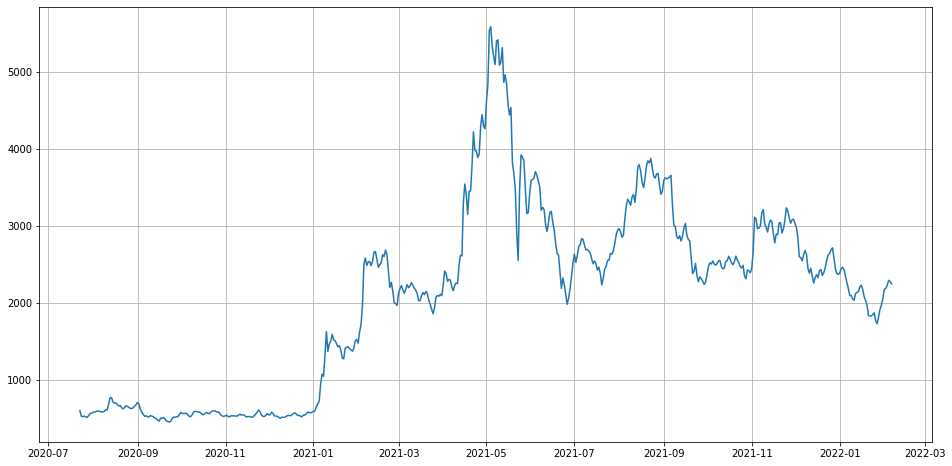

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df['Open_time'], df['Mean'])
plt.grid(True)

**예측을 위해 데이터 형식 변경**
* Prophet의 형식이 'ds', 'y'이므로 해당 열로 df_mean 데이터 프레임 만들기
* ds : 날짜 정보
* y : 가격 정보 (현재는 Open, High, Low, Close의 평균값인 Mean)

In [ ]:
df_mean = pd.DataFrame({
    'ds' : df['Open_time'], 
    'y' : df['Mean']
})
df_mean.head()

,ds,y
0,2020-07-23,598.3300
1,2020-07-24,525.0650
2,2020-07-25,518.7050
3,2020-07-26,527.7450
4,2020-07-27,515.5525


In [ ]:
# https://dacon.io/codeshare/2338
# 최적의 매개변수 찾기 - 교차 검증 및 rmse 

# 예측값 상한,하한 제어 
df_mean['cap'] = 6000
df_mean['floor'] = 0

best_score = 5000

for changepoint_prior_scale in tqdm([0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
  # 매개변수 각 조합에 대해 frophet 훈련
  m = Prophet(changepoint_prior_scale=changepoint_prior_scale, 
  growth='logistic',      # 상한, 하한 제한
  seasonality_mode='multiplicative',
  yearly_seasonality=True,  # True
  weekly_seasonality=20,
  )
  m.fit(df_mean)
  # 교차 검증 적용
  df_cv = cross_validation(m, horizon='30 days', parallel="processes")
  df_p = performance_metrics(df_cv)
  # 교차 검증 rmse 평균을 계산
  score = df_p['rmse'].mean()
  # rmse가 best_score보다 낮으면, 매개변수와 함께 기록
  if score < best_score:
    best_score = score
    best_parameters = {'changepoint_prior_scale':changepoint_prior_scale}

print('best rmse score(in cross_val): ', best_score)
print('최적의 매개변수: ', best_parameters)

  0%|          | 0/20 [00:00<?, ?it/s]INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 12 forecasts with cutoffs between 2021-07-26 00:00:00 and 2022-01-07 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f56fa26fb90>
  5%|▌         | 1/20 [00:26<08:18, 26.22s/it]INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 12 forecasts with cutoffs between 2021-07-26 00:00:00 and 2022-01-07 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5703a6f790>
 10%|█         | 2/20 [00:50<07:33, 25.22s/it]INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 12 forecasts with cutoffs between 2021-07-26 00:00:00 and 2022-01-07 00:00:00
INFO:fbprophet:Applying in paralle

best rmse score(in cross_val):  761.1920457718279
최적의 매개변수:  {'changepoint_prior_scale': 0.001}


In [ ]:
# https://hwisaek.tistory.com/entry/fbprophet-tutorials

import itertools
import numpy as np
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_mean)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 30 forecasts with cutoffs between 2020-10-29 00:00:00 and 2022-01-07 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f56fb4cd090>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 30 forecasts with cutoffs between 2020-10-29 00:00:00 and 2022-01-07 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f57067fa090>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophe

    changepoint_prior_scale         rmse
0                     0.001  1098.786028
1                     0.005  1134.548321
2                     0.010  1064.500078
3                     0.020   973.504468
4                     0.030   936.349108
5                     0.040   981.666328
6                     0.050  1010.139183
7                     0.060  1031.359124
8                     0.070  1058.326163
9                     0.080  1097.398867
10                    0.090  1130.845185
11                    0.100  1160.130417
12                    0.200  1194.053052
13                    0.300  1217.218268
14                    0.400  1217.507477
15                    0.500  1216.691815
16                    0.600  1212.205249
17                    0.700  1213.369704
18                    0.800  1211.494578
19                    0.900  1211.142119


   changepoint_prior_scale        rmse
4                     0.03  936.349108


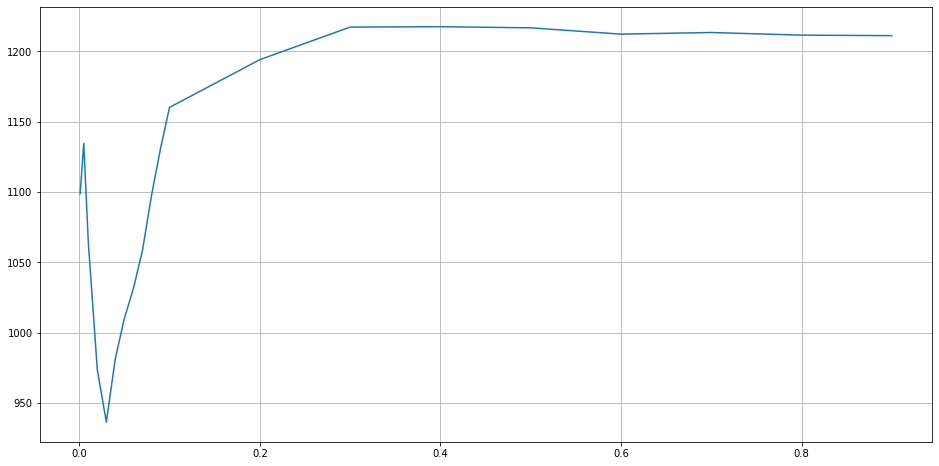

In [ ]:
min_rmse = min(tuning_results['rmse'])
print(tuning_results[tuning_results.rmse == min_rmse])

plt.figure(figsize=(16, 8))
plt.plot(tuning_results['changepoint_prior_scale'], tuning_results['rmse'])
plt.grid(True)

In [ ]:
df_flex = pd.DataFrame(columns=['flexibility', 'RMSE', 'MAE'])
num = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for flexibility in num:
  model = Prophet()
  model.changepoint_prior_scale=flexibility
  model.yearly_seasonality=True
  model.weekly_seasonality=True
  model.fit(df_mean)
  future = model.make_future_dataframe(periods=180)
  forecast = model.predict(future)
  rmse = round(np.sqrt(MSE(df["Mean"], forecast['yhat'][:len(df)])), 5)
  mae = round(MAE(df["Mean"], forecast['yhat'][:len(df)]), 5)
  df_flex = df_flex.append(pd.DataFrame([[flexibility, rmse, mae]], columns=['flexibility', 'RMSE', 'MAE']), ignore_index=True)

print(df_flex)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

    flexibility       RMSE        MAE
0         0.001  361.46244  269.85619
1         0.005  333.50529  250.93451
2         0.010  277.11996  221.93141
3         0.020  267.80379  219.50681
4         0.030  261.59325  216.84597
5         0.040  253.67373  210.24767
6         0.050  247.74421  204.75172
7         0.060  231.72310  188.41832
8         0.070  230.71180  187.37503
9         0.080  219.01249  174.22347
10        0.090  212.98204  167.07697
11        0.100  209.93988  163.32451
12        0.200  191.86225  139.59253
13        0.300  189.12208  136.04638
14        0.400  186.44202  132.58727
15        0.500  184.93270  130.82046
16        0.600  182.36548  128.76955
17        0.700  179.64022  126.70798
18        0.800  174.99561  123.30077
19        0.900  172.54709  121.22900


    flexibility       RMSE      MAE
19          0.9  172.54709  121.229
Empty DataFrame
Columns: [flexibility, RMSE, MAE]
Index: []


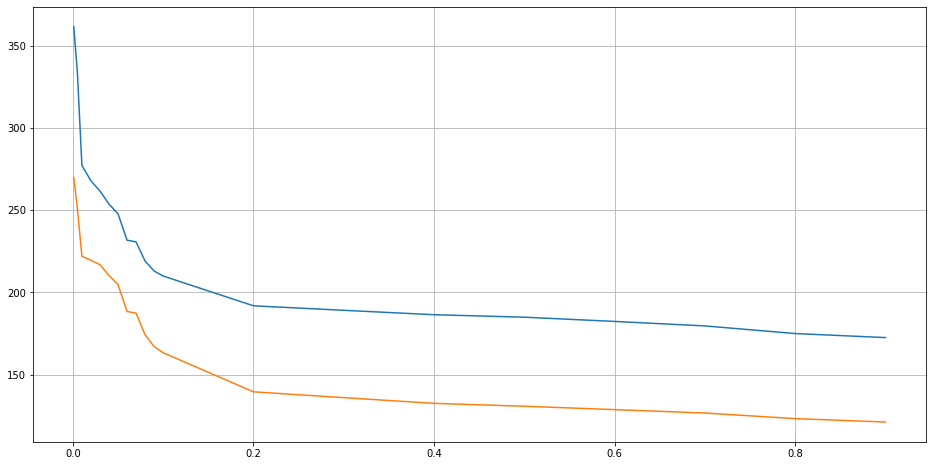

In [ ]:
min_rmse = min(df_flex['RMSE'])
min_mae = min(df_flex['MAE'])
print(df_flex[df_flex.RMSE == min_rmse])
print(df_flex[df_flex.RMSE == min_mae])

plt.figure(figsize=(16, 8))
plt.plot(df_flex['flexibility'], df_flex['RMSE'])
plt.plot(df_flex['flexibility'], df_flex['MAE'])
plt.grid(True)

**예측을 위해 Facebook Prophet 모델 적용**
* 페이스북이 만든 시계열 예측 라이브러리 Prophet에 데이터를 넣어 모델 적용
* flexibility, 연간 계절성, 주간 계절성을 고려하여 모델 적용

✅ **수정 1** ✅
* flexibility 값이 낮으면 과소적합, 높으면 과대적합하여 예측
* 설정하지 않으면 기본 0.05로 예측
* 예측된 그래프가 너무 단순한 것 같다면 값을 높이고, 과하게 예측된 것 같다면 값을 낮춤
* 예측된 그래프와 맨 마지막에 확인하는 MSE, RMSE, MAE 값을 확인하여 flexibility 값 조절
* 코드블록 내 model.changepoint_prior_scale 값(초록 글씨)만 수정하면 됨
* 예시 : 0.9의 flexibility로 모델 적합
* **0.9**를 원하는 값으로 수정
```
model.changepoint_prior_scale=0.9
```

✅ **수정 2** ✅
* 월, 요일에 따라 규칙성이 나타나는 경우 계절성을 고려
* 1년 정도로 전체 개수가 적은 데이터의 경우 계절성 고려하지 않는 것이 좋음
* 코드블록 내 model.yearly_seasonality, model.weekly_seasonality 값(파란 글씨)만 수정하면 됨
* 예시 : 계절성을 고려해야하는 모델
* **True/False** 중 원하는 값으로 수정
```
model.yearly_seasonality=True
model.weekly_seasonality=True
```

In [ ]:
model = Prophet()
flexibility = 0.001
model.changepoint_prior_scale=flexibility
model.yearly_seasonality=True
model.weekly_seasonality=True
model.fit(df_mean)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**적용한 모델을 기반으로 예측한 데이터 생성**
* 1년치 가격 예측을 위해 365개의 데이터 생성
* ds : 날짜 정보
* yhat : 예측된 가격 정보
* yhat_lower : 예측된 가격의 하한값
* yhat_upper : 예측된 가격의 상한값


✅ **수정** ✅
* 원하는 예측 데이터의 개수 설정
* 1년 정도로 전체 개수가 적은 데이터의 경우 전체 데이터의 절반 이하로 설정하는 것을 추천
* 코드블록 내 periods 값 숫자(청록색 글씨)만 수정하면 됨
* 예시 : 326개의 예측 데이터 생성
* **326**를 원하는 값으로 수정

```
future = model.make_future_dataframe(periods=326)
```

In [ ]:
future = model.make_future_dataframe(periods=180)
future['floor'] = 0
forecast = model.predict(future)

forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-23,654.828982,199.834260,1097.908098
1,2020-07-24,639.294841,186.521564,1117.451103
2,2020-07-25,640.907945,188.292612,1112.365161
3,2020-07-26,631.401632,170.736255,1108.182100
4,2020-07-27,654.326149,179.085064,1134.319337
...,...,...,...,...
739,2022-08-01,4643.636087,4204.202880,5123.365576
740,2022-08-02,4656.648459,4182.585847,5116.683475
741,2022-08-03,4671.561742,4213.958204,5117.065652
742,2022-08-04,4705.437629,4231.414960,5143.853732


**예측 정확도 평가를 위한 값**
* MSE, RMSE, MAE 값을 이용해 모델의 정확도 평가 가능
* 원래 기능은 같은 데이터에 여러 가지의 모델을 적용했을 때 어떤 모형이 가장 예측을 잘 하는지 평가하기 위해 사용
* 다른 데이터에 대해 같은 모델을 적용했을 때(우리의 경우)는 대략적으로 참고만 하면 좋을 것 같음


* MSE, RMSE, MAE 값이 낮을수록 예측을 잘 했다고 평가
* RMSE는 MSE 값에 루트 씌운 값으로 MSE 값이 너무 커서 그냥 하나 넣어봄

In [ ]:
# MSE, MAE는 낮을 수록 상대적으로 더 좋은 모델
mse = str(round(MSE(df["Mean"], forecast['yhat'][:len(df)]), 5))
rmse = str(round(np.sqrt(MSE(df["Mean"], forecast['yhat'][:len(df)])), 5))
mae = str(round(MAE(df["Mean"], forecast['yhat'][:len(df)]), 5))

print("MSE : ", mse)
print("RMSE : ", rmse)
print("MAE : ", mae)

MSE :  130655.09813
RMSE :  361.46244
MAE :  269.85619


**예측값과 실제값을 비교하는 그래프**
* 예측값은 주황 실선으로, 실제값은 파란 실선으로 그려진 그래프

📌 **분석** 📌
* **2021년 3월까지는 실제값과 매우 유사함**
* **2021년 3월 이후 값의 차이가 심하게 나는데 이는 가격 외의 요인이 작용했다고 보여짐**

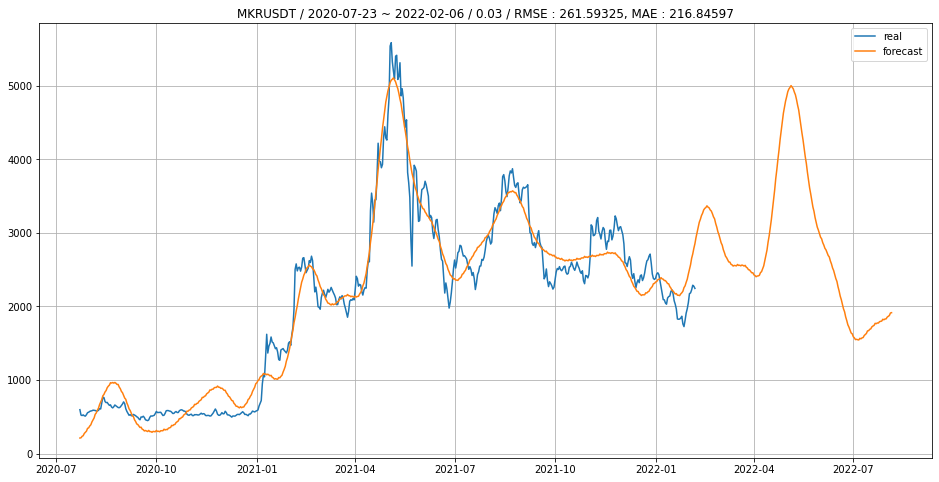

In [ ]:
flex = str(flexibility)
start = str(df["Open_time"][0])[0:10]
end = str(df["Open_time"][len(df)-1])[0:10]

plt.figure(figsize=(16, 8))
plt.plot(df['Open_time'], df['Mean'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label = 'forecast')
plt.title(symbol+' / '+start+' ~ '+end+' / '+flex+' / RMSE : '+rmse+', MAE : '+mae)
plt.grid(True)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

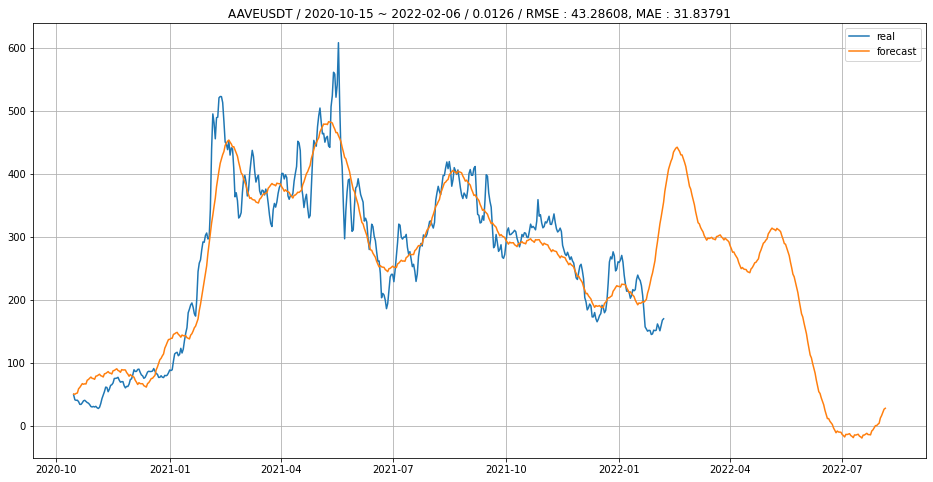

In [ ]:
flex = str(flexibility)
start = str(df["Open_time"][0])[0:10]
end = str(df["Open_time"][len(df)-1])[0:10]

plt.figure(figsize=(16, 8))
plt.plot(df['Open_time'], df['Mean'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label = 'forecast')
plt.title(symbol+' / '+start+' ~ '+end+' / '+flex+' / RMSE : '+rmse+', MAE : '+mae)
plt.grid(True)
plt.legend()
plt.savefig(symbol+'_'+start+'_'+end+'_'+flex+'.png')
files.download(symbol+'_'+start+'_'+end+'_'+flex+'.png')
plt.show()